## Business Case:

   * Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.


  * In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made.
    
    
  * We need to predict a model which predicts if an insurance claims or fradulent or not.

Importing the required Libraries which is neccessary to complete this project,

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve,f1_score,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

Loading the Dataset

In [2]:
d = pd.read_csv('Automobile_insurance_fraud.csv')
d

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


There are 1000 rows and 40 columns in our dataset and we will check the datatypes of each column and missing values if any or not so on..

Target variable is "fraud_reported" as it is categorical and with 2 values Yes/no and hence it is " BINARY CLASSIFICATION ".

Info () method will gives the information about the each features data types and memory usage and index range entries and non null counts of each column for better understanding.

In [3]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [4]:
d.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

As we can seee that our dataset is not having null values except column "_c39 " and we can drop this column as it wont impac t our predictions and also it has completely NaN values.

In [5]:
# Dropping the c39 columns

d = d.drop(columns = ['_c39'],axis = 1)

In [6]:
d.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


Now we have 39 columns and we will see how the data has been distributed in a dataset and we will look into some relationship / comparison in visualization through plots/graphs for easy and better understanding.

Also we have categorical and numerical data in our dataset.We will use histogram to view our numerical columns.

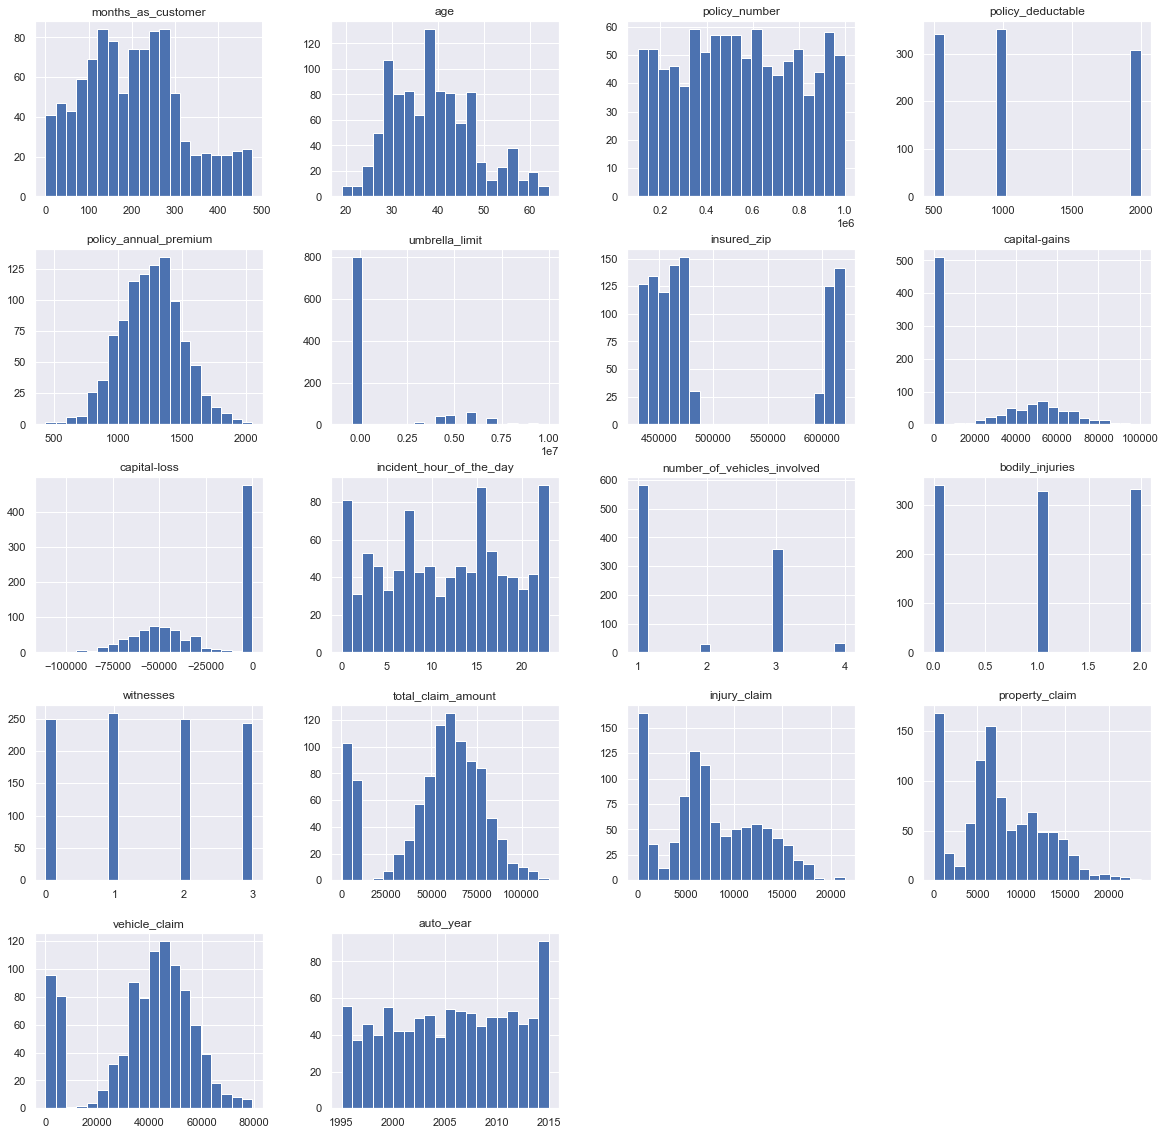

In [7]:
sns.set_theme()
d.hist(bins = 20, figsize = (20,20))
plt.show()

From the above plot we can see the below observations,

 * Policy number columns has distributed uniformly.
 
 * capital loss and capital gain has some skewed towards left and right side.
 
 * numbers of vehicles involved, bodily injuries, witnesses columns has values of 0-4 and not in continous range and from thois we can see that mostly 1 vehicles involved in incident and minimum 1 witness are there who witnessed the incident.
 
 * total claim amount,injury claim, property claim , vehicle claim, policy annual premium has normally distributed  and we can see mild outliers on vehicle claim on lower side.
 
 * umbrella limit columns has skewed more on right side and it has 0 for most of the customers.
 
 * policy deductable has fixed amount of 500,1000,2000 and mostly they are deducting 1000 for the policy and based on insurance which customers availed.

We will see how the remaining columns of categorical data distributed in dataset through bar plot / countplot.

In [8]:
d['policy_state'].value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

<AxesSubplot:xlabel='policy_state', ylabel='count'>

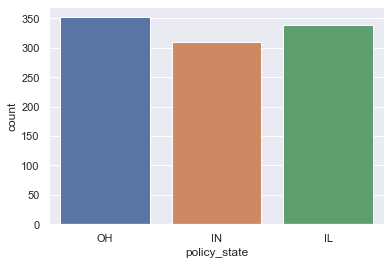

In [9]:
sns.countplot(d['policy_state'])

As per the above plot, Customers insured for insurance in State OH and IL.

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

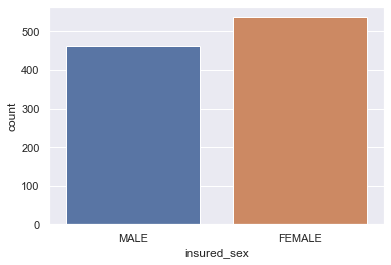

In [10]:
sns.countplot(d['insured_sex'])

Most of the customers are Females in terms of Sex who has taken the Insurance.

In [11]:
d['insured_education_level'].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

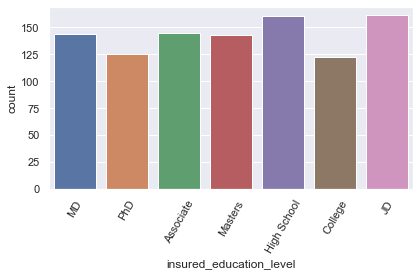

In [12]:
sns.countplot(x = d['insured_education_level'])
plt.xticks(rotation = 60)
plt.tight_layout()

<AxesSubplot:xlabel='insured_education_level'>

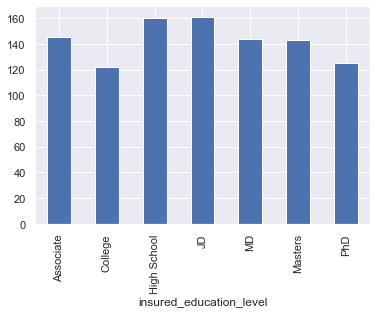

In [13]:
d.groupby('insured_education_level').policy_annual_premium.count().plot.bar()

From the above plot, We can that most of the customers eductaion level are " High School && JD ".

Policy annual premium amount is depends on education level and their occupation and we can see again that the customers who belongs to " High School && JD " are having more policy annual premium.

In [14]:
d['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

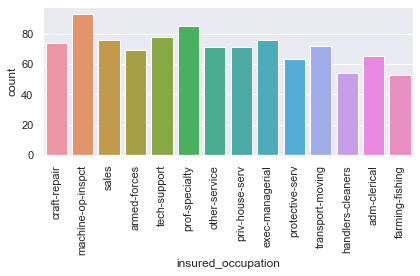

In [15]:
sns.countplot(d['insured_occupation'])
plt.xticks(rotation = 90)
plt.tight_layout()

Most of the customers are belongs to the occupation " machine-op-inspct " and " prof-specialty " who has taken this insurance.

In [16]:
d['insured_hobbies'].value_counts()

reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

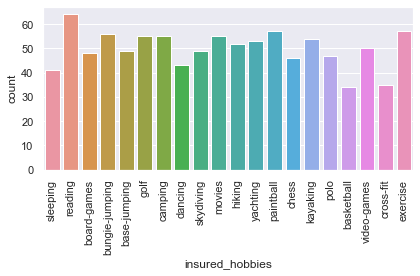

In [17]:
plt.figsize = (12,8)
sns.countplot(d['insured_hobbies'])
plt.xticks(rotation = 90)
plt.tight_layout()

" reading " is the hobbies for the most of the customers who has insured for insurance and " exercise && paintball " are the next most hobbies for several customers.

In [18]:
d['incident_type'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

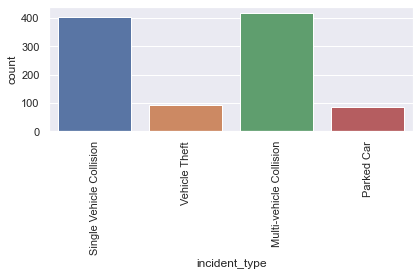

In [19]:
sns.countplot(d['incident_type'])
plt.xticks(rotation = 90)
plt.tight_layout()

<AxesSubplot:xlabel='incident_type'>

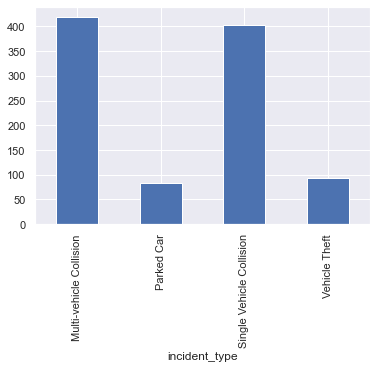

In [20]:
d.groupby('incident_type').fraud_reported.count().plot.bar()

So the customers who are availing insurance for the damage are stating the incident type as " Multi-Level Collision / Single vehicle Collision ".

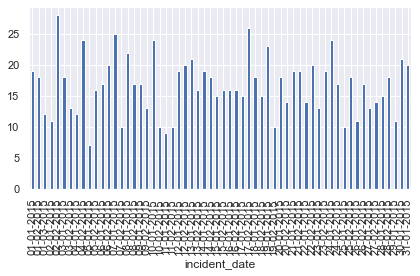

In [21]:
plt.figsize = (20,12)
d.groupby('incident_date').fraud_reported.count().plot.bar()
plt.xticks(rotation = 90)                                .
plt.tight_layout()


More number of fraud has been reported on February Month of 2015 as per the above plot in terms of incident date.

In [22]:
d['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

<AxesSubplot:xlabel='collision_type'>

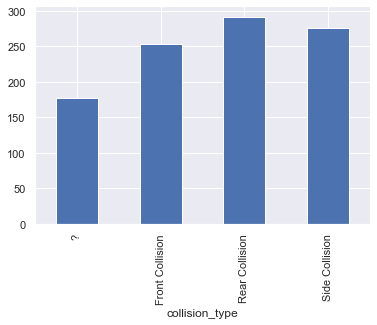

In [23]:
d.groupby('collision_type').fraud_reported.count().plot.bar()

We have ? as one of the inputs and we can change later in data clean part to Unknown /None as data is not available or decided not to enclosed/ forgot to enter the data.

Other than this ,the above plot shows that most of the collision type is "Rear Collision ".

In [24]:
d['incident_severity'].value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

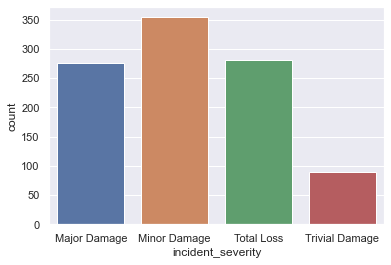

In [25]:
sns.countplot(d['incident_severity'])

<AxesSubplot:xlabel='incident_severity'>

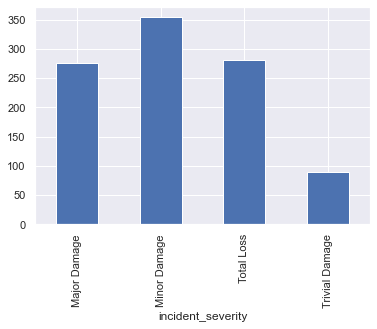

In [26]:
d.groupby('incident_severity').fraud_reported.count().plot.bar()

Customers who has insured insureance mentioned the severity of incident as " Minor Damage ".

<AxesSubplot:xlabel='authorities_contacted'>

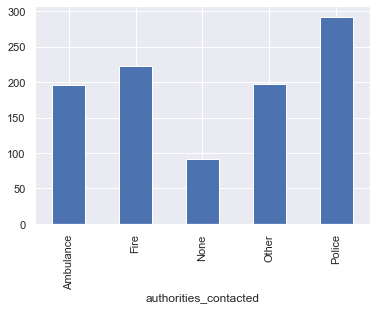

In [27]:
d.groupby('authorities_contacted').fraud_reported.count().plot.bar()

Most of the customers mentioned that authorities who they had contacted at the time of incident is Police than other authoritied like fire,ambulance.

In [28]:
d['police_report_available'].value_counts()

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

<AxesSubplot:xlabel='police_report_available'>

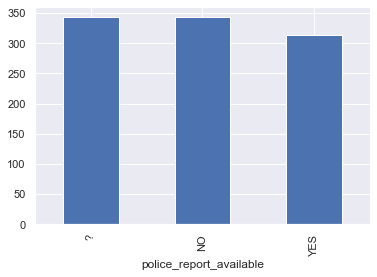

In [29]:
d.groupby('police_report_available').fraud_reported.count().plot.bar()

Here it is showing that police report for most of the incident is not available and not given for claiming the insurance.

<AxesSubplot:xlabel='incident_state'>

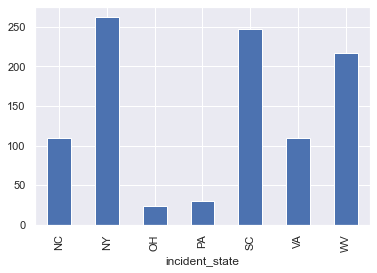

In [30]:
d.groupby('incident_state').fraud_reported.count().plot.bar()

NY State reported more frauds in order to avail the insurance claims.

<AxesSubplot:xlabel='incident_city'>

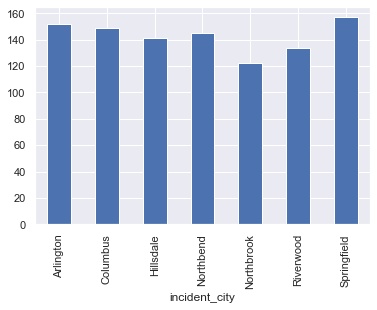

In [31]:
d.groupby('incident_city').fraud_reported.count().plot.bar()

From the above bar plot, Springfield city reported more for availing the insurance claims.

<AxesSubplot:xlabel='property_damage'>

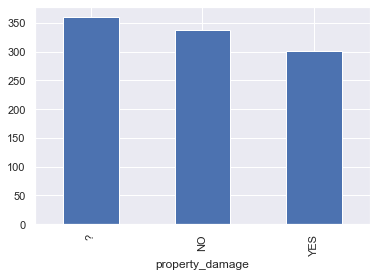

In [32]:
d.groupby('property_damage').property_claim.count().plot.bar()

There is no property damage happened to avail property claims and most of the case it is not known from the above plot.

In [33]:
d['bodily_injuries'].value_counts()

0    340
2    332
1    328
Name: bodily_injuries, dtype: int64

<AxesSubplot:xlabel='bodily_injuries'>

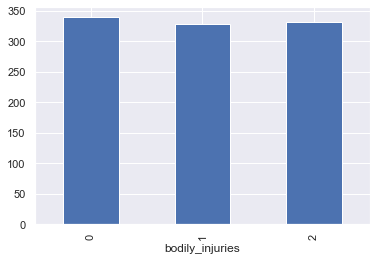

In [34]:
d.groupby('bodily_injuries').injury_claim.count().plot.bar()

From the above plot, it is clear that not much injury on body and it is 1 or 2 places.

In [35]:
d['total_claim_amount'].value_counts()

59400    5
75400    4
60600    4
2640     4
58500    4
        ..
57970    1
41580    1
45180    1
3690     1
71680    1
Name: total_claim_amount, Length: 763, dtype: int64

<AxesSubplot:xlabel='insured_hobbies'>

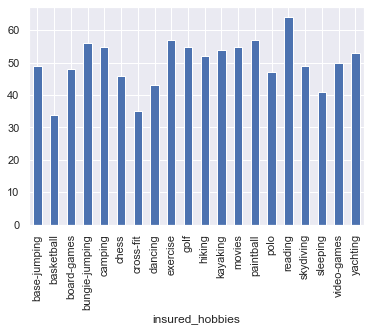

In [36]:
d.groupby('insured_hobbies').total_claim_amount.count().plot.bar()

Customer who has hobby as "reading" has insured more claim amount of > 60.

In [37]:
d['auto_make'].value_counts()

Suburu        80
Saab          80
Dodge         80
Nissan        78
Chevrolet     76
BMW           72
Ford          72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

<AxesSubplot:xlabel='auto_make'>

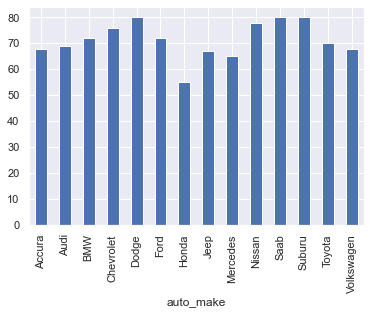

In [38]:
d.groupby('auto_make').vehicle_claim.count().plot.bar()

Most of the vehicle claims insured is for the automobile brand " Dodge, saab, subburu " and least insured brand is "Honda"

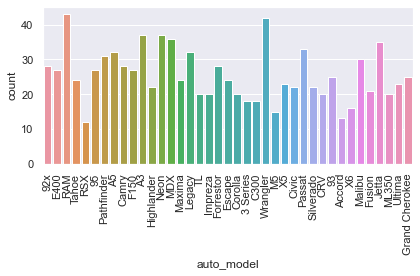

In [39]:
plt.figsize = (30,20)
sns.countplot(d['auto_model'])
plt.xticks(rotation = 90)
plt.tight_layout()

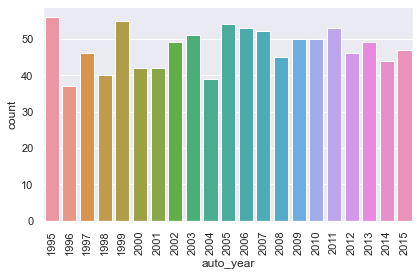

In [40]:
plt.figsize = (30,20)
sns.countplot(d['auto_year'])
plt.xticks(rotation = 90)
plt.tight_layout()

Most of the automobile model which is claiming insurance is RAM && WRANGLER.
Most of the vehicle manufacture year is 1995, 1999 and 2005-2007 who is availing vehicle claim insurance.

As the model predict is about fraud detection in insurance claims, We can see the below observations,

1) More customers reported the incident on Month of Feb on 2015 to avail insurance.

2) Also they don't seem have any body injury and vehicle has been collisioned with one another and reported incident is Multi- vehicle collision incident.

3) Vehicles has hit on rear side of the vehicle and that proves the less body injury.

4) So the property damage is minor as it is rear collision and other vehicle could have hitted the vehicle on rear part and that causes less damage and less injury.

5) After the incident, Customers who reported for insurance contatcted Police for reporting the incident than fire or ambulance and also most of the case they don't have report from police.

6) Springfield city ranks high on reporting the incident for claiming the insurance.

7) As per the analysis and collected data, we can see that most of the insurance claim fraudulent is happening in the state NY.

8) Automobile Brand who has gone through incident and reported for claiming the insurance  mostly is - DODGE, SAAB, SUBBURU.

9) most of the customers who reported insurance claims hobbies are Reading.

As we have seen the data distribution through plots, We can go ahead and do feature engineering as we have categorical data in our dataset.

In [41]:
# Replacing ? to Unknown AS customers preferred not  to disclose or they forgotten to enter these.

d['collision_type'] = d['collision_type'].str.strip().replace({'?': 'Unknown'})
d['police_report_available'] = d['police_report_available'].str.strip().replace({'?': 'Unknown'})

In [42]:
#Splitting the numerical and categorical datatupes separately.

num = d.select_dtypes(exclude = object)
cat = d.select_dtypes(include = object)

In [43]:
num

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004
1,228,42,342868,2000,1197.22,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007
2,134,29,687698,2000,1413.14,5000000,430632,35100,0,7,3,2,3,34650,7700,3850,23100,2007
3,256,41,227811,2000,1415.74,6000000,608117,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014
4,228,44,367455,1000,1583.91,6000000,610706,66000,-46000,20,1,0,1,6500,1300,650,4550,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1000,1310.80,0,431289,0,0,20,1,0,1,87200,17440,8720,61040,2006
996,285,41,186934,1000,1436.79,0,608177,70900,0,23,1,2,3,108480,18080,18080,72320,2015
997,130,34,918516,500,1383.49,3000000,442797,35100,0,4,3,2,3,67500,7500,7500,52500,1996
998,458,62,533940,2000,1356.92,5000000,441714,0,0,2,1,0,1,46980,5220,5220,36540,1998


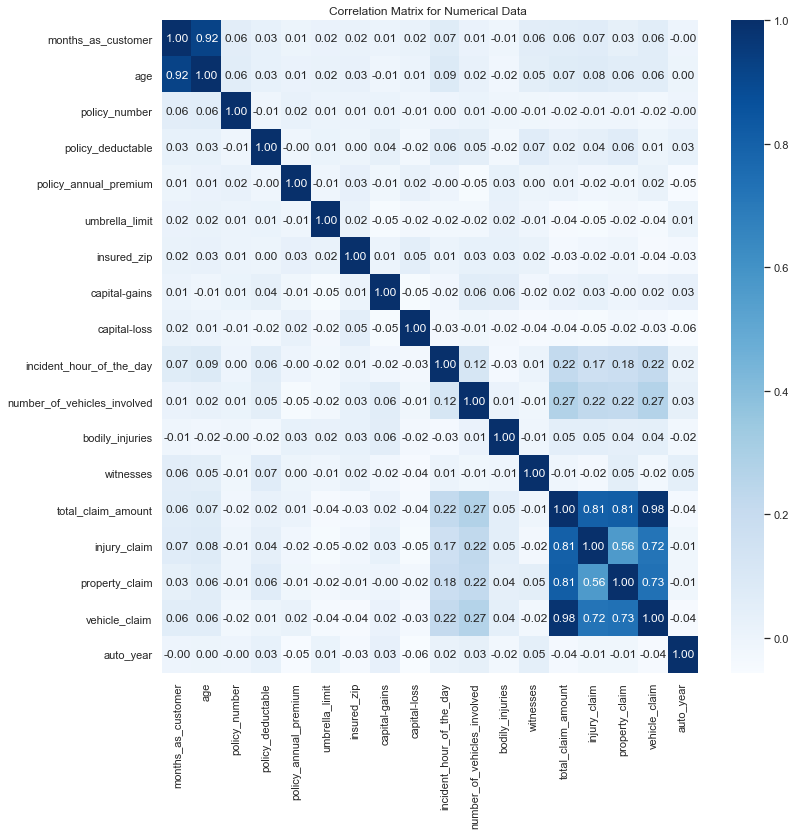

In [46]:
corr = num.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr, annot = True,cmap = 'Blues',fmt = '.2f')
plt.title("Correlation Matrix for Numerical Data ")
plt.show()

So there is a strong correlation between AGE and MONTH AS CUSTOMER and also TOTAL CLAIM AMOUNT with VEHICLE CLAIM.

I am dropping the month as customer column because we have policy start date in our dataset and we can calculate the months from that column.

Dropping the Total claim amount as it is nothing but the sum of claims of vehicle + property + injury.

In [47]:
#Dropping the respective 2 columns.

num = num.drop(columns = ['total_claim_amount','months_as_customer'],axis =1)
num

,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,auto_year
0,48,521585,1000,1406.91,0,466132,53300,0,5,1,1,2,6510,13020,52080,2004
1,42,342868,2000,1197.22,5000000,468176,0,0,8,1,0,0,780,780,3510,2007
2,29,687698,2000,1413.14,5000000,430632,35100,0,7,3,2,3,7700,3850,23100,2007
3,41,227811,2000,1415.74,6000000,608117,48900,-62400,5,1,1,2,6340,6340,50720,2014
4,44,367455,1000,1583.91,6000000,610706,66000,-46000,20,1,0,1,1300,650,4550,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,38,941851,1000,1310.80,0,431289,0,0,20,1,0,1,17440,8720,61040,2006
996,41,186934,1000,1436.79,0,608177,70900,0,23,1,2,3,18080,18080,72320,2015
997,34,918516,500,1383.49,3000000,442797,35100,0,4,3,2,3,7500,7500,52500,1996
998,62,533940,2000,1356.92,5000000,441714,0,0,2,1,0,1,5220,5220,36540,1998


In [48]:
cat

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,...,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,17-10-2014,OH,250/500,MALE,MD,craft-repair,sleeping,husband,25-01-2015,Single Vehicle Collision,...,Major Damage,Police,SC,Columbus,9935 4th Drive,YES,YES,Saab,92x,Y
1,27-06-2006,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,21-01-2015,Vehicle Theft,...,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,?,Unknown,Mercedes,E400,Y
2,06-09-2000,OH,100/300,FEMALE,PhD,sales,board-games,own-child,22-02-2015,Multi-vehicle Collision,...,Minor Damage,Police,NY,Columbus,7121 Francis Lane,NO,NO,Dodge,RAM,N
3,25-05-1990,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,10-01-2015,Single Vehicle Collision,...,Major Damage,Police,OH,Arlington,6956 Maple Drive,?,NO,Chevrolet,Tahoe,Y
4,06-06-2014,IL,500/1000,MALE,Associate,sales,board-games,unmarried,17-02-2015,Vehicle Theft,...,Minor Damage,None,NY,Arlington,3041 3rd Ave,NO,NO,Accura,RSX,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,16-07-1991,OH,500/1000,FEMALE,Masters,craft-repair,paintball,unmarried,22-02-2015,Single Vehicle Collision,...,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,YES,Unknown,Honda,Accord,N
996,05-01-2014,IL,100/300,FEMALE,PhD,prof-specialty,sleeping,wife,24-01-2015,Single Vehicle Collision,...,Major Damage,Fire,SC,Northbend,3092 Texas Drive,YES,Unknown,Volkswagen,Passat,N
997,17-02-2003,OH,250/500,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,23-01-2015,Multi-vehicle Collision,...,Minor Damage,Police,NC,Arlington,7629 5th St,?,YES,Suburu,Impreza,N
998,18-11-2011,IL,500/1000,MALE,Associate,handlers-cleaners,base-jumping,wife,26-02-2015,Single Vehicle Collision,...,Major Damage,Other,NY,Arlington,6128 Elm Lane,?,YES,Audi,A5,N


In [49]:
cat.columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

We have Policy start date/ month/ year and incident day/month/year.So I am separating day , month, year from policy start date and taking only day and month from incident reported as all the reported incidents happened in 2015 using Pandas Datetime Function.

In [50]:
cat['policy_bind_day'] = pd.DatetimeIndex(cat['policy_bind_date']).day
cat['policy_bind_month'] = pd.DatetimeIndex(cat['policy_bind_date']).month
cat['policy_bind_year'] = pd.DatetimeIndex(cat['policy_bind_date']).year
cat['incident_day'] = pd.DatetimeIndex(cat['incident_date']).day
cat['incident_month'] = pd.DatetimeIndex(cat['incident_date']).month

In [51]:
#Dropping the actual columns.

cat  = cat.drop(columns = ['policy_bind_date','incident_date'],axis = 1)
cat

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,...,property_damage,police_report_available,auto_make,auto_model,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month
0,OH,250/500,MALE,MD,craft-repair,sleeping,husband,Single Vehicle Collision,Side Collision,Major Damage,...,YES,YES,Saab,92x,Y,17,10,2014,25,1
1,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,Vehicle Theft,Unknown,Minor Damage,...,?,Unknown,Mercedes,E400,Y,27,6,2006,21,1
2,OH,100/300,FEMALE,PhD,sales,board-games,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,...,NO,NO,Dodge,RAM,N,9,6,2000,22,2
3,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,Single Vehicle Collision,Front Collision,Major Damage,...,?,NO,Chevrolet,Tahoe,Y,25,5,1990,1,10
4,IL,500/1000,MALE,Associate,sales,board-games,unmarried,Vehicle Theft,Unknown,Minor Damage,...,NO,NO,Accura,RSX,N,6,6,2014,17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,OH,500/1000,FEMALE,Masters,craft-repair,paintball,unmarried,Single Vehicle Collision,Front Collision,Minor Damage,...,YES,Unknown,Honda,Accord,N,16,7,1991,22,2
996,IL,100/300,FEMALE,PhD,prof-specialty,sleeping,wife,Single Vehicle Collision,Rear Collision,Major Damage,...,YES,Unknown,Volkswagen,Passat,N,1,5,2014,24,1
997,OH,250/500,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,Multi-vehicle Collision,Side Collision,Minor Damage,...,?,YES,Suburu,Impreza,N,17,2,2003,23,1
998,IL,500/1000,MALE,Associate,handlers-cleaners,base-jumping,wife,Single Vehicle Collision,Rear Collision,Major Damage,...,?,YES,Audi,A5,N,18,11,2011,26,2


Applying Label Encoder encoding tech niques to convert categorical data into numerical data,

In [52]:
le = LabelEncoder()
col = ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level','insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity','authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available','auto_make', 'auto_model', 'fraud_reported']

for i in col:
    cat[col]= cat[col].apply(le.fit_transform)

In [53]:
cat.head()


,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,...,property_damage,police_report_available,auto_make,auto_model,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month
0,2,1,1,4,2,17,0,2,2,0,...,2,2,10,1,1,17,10,2014,25,1
1,1,1,1,4,6,15,2,3,3,1,...,0,1,8,12,1,27,6,2006,21,1
2,2,0,0,6,11,2,3,0,1,1,...,1,0,4,30,0,9,6,2000,22,2
3,0,1,0,6,1,2,4,2,0,0,...,0,0,3,34,1,25,5,1990,1,10
4,0,2,1,0,11,2,4,3,3,1,...,1,0,0,31,0,6,6,2014,17,2


Now all our data's has been converted into numerical.

In [54]:
num.describe()

,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,7433.420000,7399.570000,37928.950000,2005.103000
std,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,4880.951853,4824.726179,18886.252893,6.015861
min,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,70.000000,1995.000000
25%,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,4295.000000,4445.000000,30292.500000,2000.000000
50%,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,6775.000000,6750.000000,42100.000000,2005.000000
75%,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,11305.000000,10885.000000,50822.500000,2010.000000
max,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,21450.000000,23670.000000,79560.000000,2015.000000


As we dont have any null values, we may have skewness / outliers in our dataset and we will confirm with dist plot / box plot.

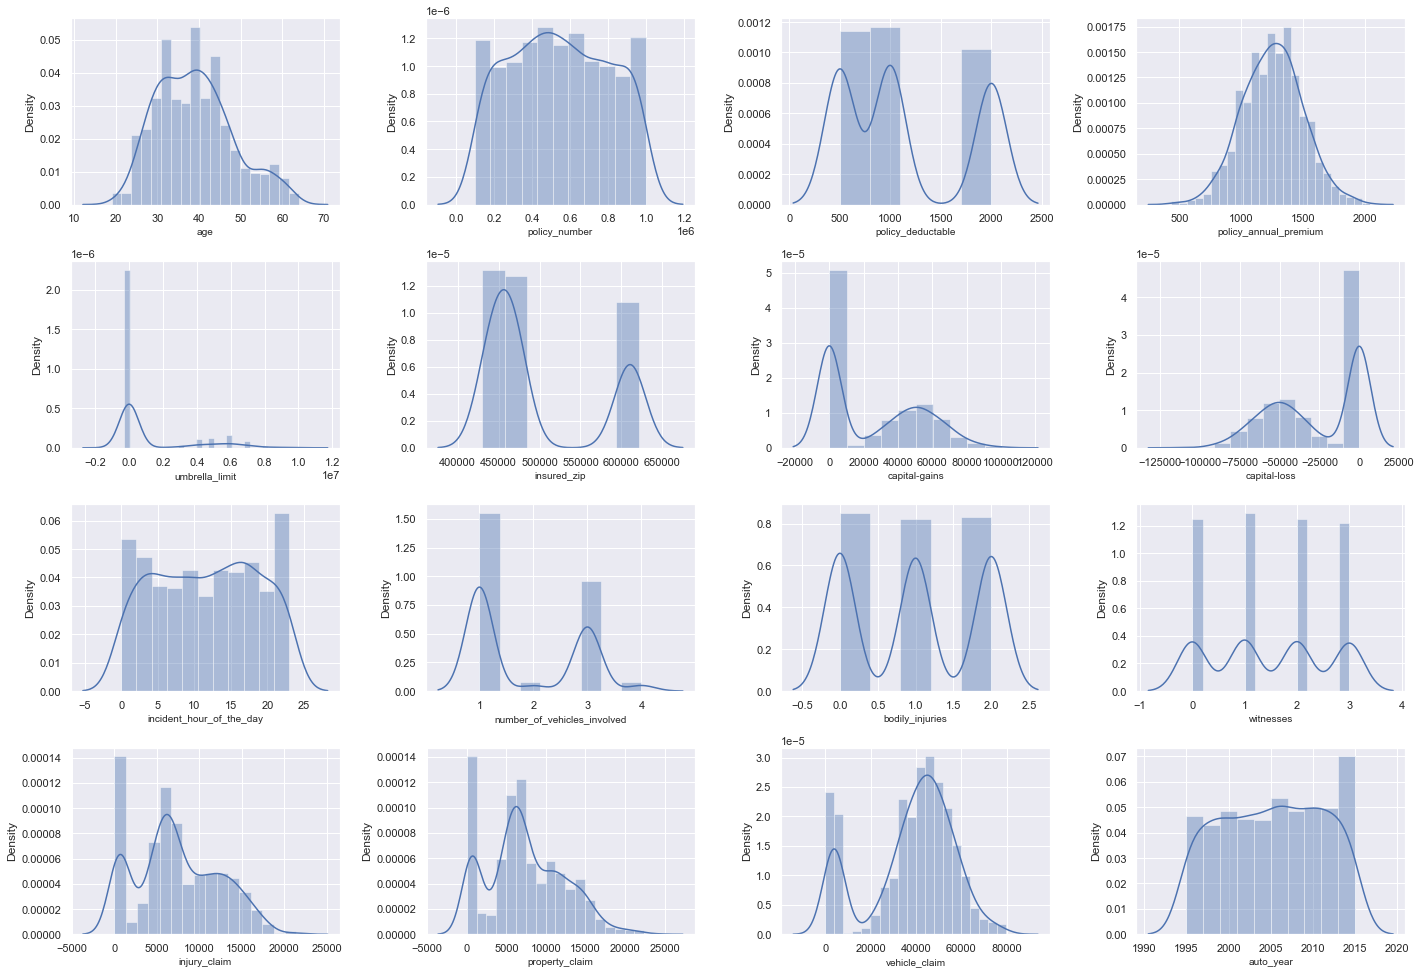

In [55]:
plt.figure(figsize = (20,20))
pltnumber = 1

for column in num:
    if pltnumber<=24:
        ax = plt.subplot(6,4,pltnumber)
        sns.distplot(num[column])
        plt.xlabel(column,fontsize=10)
        pltnumber+=1
plt.tight_layout()

So from the above dist plot, we can conclude that most of the columns don't have any skewness in their data.


Umbrella Limit has more skewness as it is nothing but the extra level of security for the custo0mers who are being sued by others for the cause of accidents / damages.

Most of the customers didn't keep Umbrella limit and we can see from the above plot that it is 0.

capital Loss has data of negatively and that's the reason our plot skewed left.

Property claim has skewed data positive.

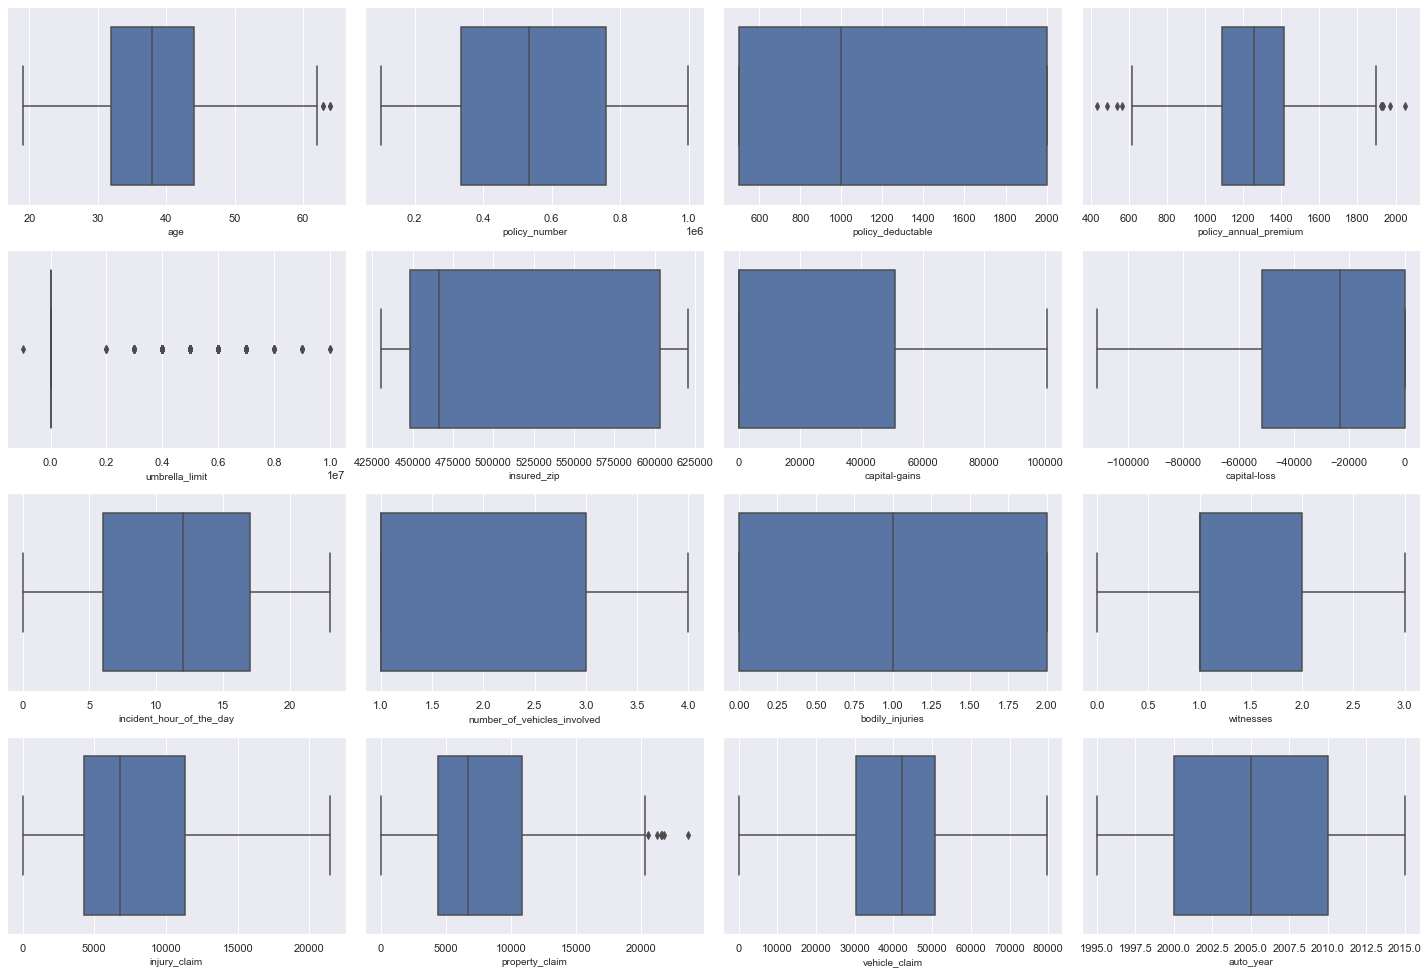

In [56]:
plt.figure(figsize = (20,20))
pltnumber = 1

for column in num:
    if pltnumber<=24:
        ax = plt.subplot(6,4,pltnumber)
        sns.boxplot(num[column])
        plt.xlabel(column,fontsize=10)
        pltnumber+=1
plt.tight_layout()

As most of our data is not having any outliers,I will apply skewness method to remove check the skewed data and we can see umbrella limit has skewnes of >1.

So I will drop this column as discussed in earlier graph,Most of the customers limit is 0.

In [57]:
num.skew()

age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64

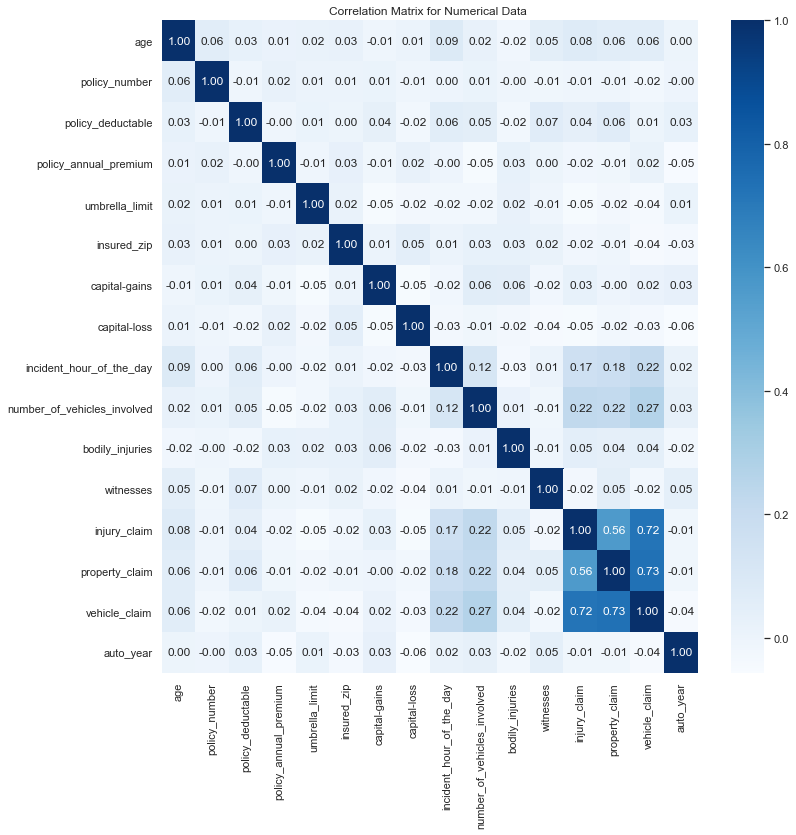

In [58]:
#Final Correlation matrix after dropping the correlated variables from the dataset.

corr = num.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr, annot = True,cmap = 'Blues',fmt = '.2f')
plt.title("Correlation Matrix for Numerical Data ")
plt.show()

Merging the numerical and categorical into single dataframe,

In [59]:
df = pd.concat([num,cat],axis = 1)
df

,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,...,property_damage,police_report_available,auto_make,auto_model,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month
0,48,521585,1000,1406.91,0,466132,53300,0,5,1,...,2,2,10,1,1,17,10,2014,25,1
1,42,342868,2000,1197.22,5000000,468176,0,0,8,1,...,0,1,8,12,1,27,6,2006,21,1
2,29,687698,2000,1413.14,5000000,430632,35100,0,7,3,...,1,0,4,30,0,9,6,2000,22,2
3,41,227811,2000,1415.74,6000000,608117,48900,-62400,5,1,...,0,0,3,34,1,25,5,1990,1,10
4,44,367455,1000,1583.91,6000000,610706,66000,-46000,20,1,...,1,0,0,31,0,6,6,2014,17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,38,941851,1000,1310.80,0,431289,0,0,20,1,...,2,1,6,6,0,16,7,1991,22,2
996,41,186934,1000,1436.79,0,608177,70900,0,23,1,...,2,1,13,28,0,1,5,2014,24,1
997,34,918516,500,1383.49,3000000,442797,35100,0,4,3,...,0,2,11,19,0,17,2,2003,23,1
998,62,533940,2000,1356.92,5000000,441714,0,0,2,1,...,0,2,1,5,0,18,11,2011,26,2


So total our dataset has 1000 rows and 40 columns and let's split the X and Y variables for further model building steps,

In [60]:
X = df.drop(columns = ['fraud_reported','umbrella_limit'],axis = 1)
y = df['fraud_reported']

As it is binary classification,we will check whether our classes are balanced or not before scaling the data.

In [61]:
y.value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

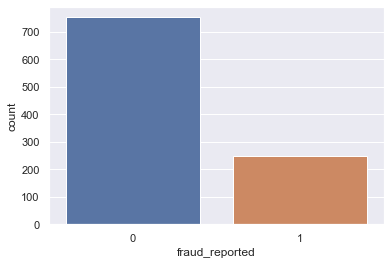

In [62]:
sns.countplot(y)

From the countplot above, we confirmed that our classes need to be balanced as it is imbalanced.

SMOTE technique is re-sampling techniques and it will  increase the minority class to majority class to make the classes balanced.

In [63]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

sm = SMOTE()
x_over,y_over = sm.fit_resample(X,y)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

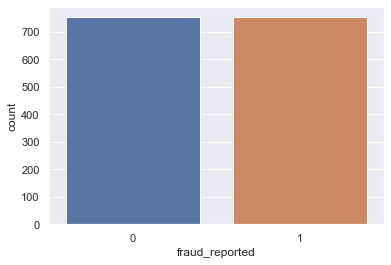

In [64]:
sns.countplot(y_over)

Now our classes get balanced and we will proceed with scaling the data.

Scaling the data is important as our data will have different range of values and in-order to equalize the range, we will perform scaling and this will bring all the data's to same range 0-1 for the smoother prediction of building the model.

In [65]:
sca = StandardScaler()
x_sc = sca.fit_transform(x_over)

Train -Test -Split

In [66]:
x_train,x_test,y_train,y_test = train_test_split(x_sc,y_over, test_size = 0.25, random_state = 111)

We have splitted the training data and testing data and then now we need to proceed for building the model for various algorithms.

As classes are imbalanced ,So accuracy score will give output by taking majority classes into consideration.So f1 score metrics is good to check for accuracy in terms of imbalanced class.

Here I am using the below algorithms to build the model and chose a best model by comparing the F1 Score with cross validation score. 

1) Decision Tree Classifier
2) Random Forest Classifier
3) K Neighbors Classifier
4) Ada Boost Classifier

Model 1: Decision Tree Classifier

In [67]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
scr_dt = cross_val_score(dt,x_over,y_over,cv=5)


print("F1 score \n", f1_score(y_test,y_pred))
print("CV Score :", scr_dt.mean())
print("-------------------------------------------------------\n")
print("Classification Report \n", classification_report(y_test,y_pred))
print("--------------------------------------------------------\n")
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))

F1 score 
 0.8253968253968254
CV Score : 0.8048425777210623
-------------------------------------------------------

Classification Report 
               precision    recall  f1-score   support

           0       0.81      0.84      0.82       184
           1       0.84      0.81      0.83       193

    accuracy                           0.82       377
   macro avg       0.83      0.83      0.82       377
weighted avg       0.83      0.82      0.82       377

--------------------------------------------------------

Confusion Matrix 
 [[155  29]
 [ 37 156]]
ROC AUC Score 
 0.8253407298941203


Model 2: Random Forest Classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
scr_rfc = cross_val_score(rfc,x_over,y_over,cv=5)

print("F1 score \n", f1_score(y_test,y_pred))
print("CV Score  :", scr_rfc.mean())
print("-------------------------------------------------------\n")
print("Classification Report \n", classification_report(y_test,y_pred))
print("--------------------------------------------------------\n")
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))

F1 score 
 0.9023746701846964
CV Score  : 0.8606411300081407
-------------------------------------------------------

Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       184
           1       0.92      0.89      0.90       193

    accuracy                           0.90       377
   macro avg       0.90      0.90      0.90       377
weighted avg       0.90      0.90      0.90       377

--------------------------------------------------------

Confusion Matrix 
 [[169  15]
 [ 22 171]]
ROC AUC Score 
 0.9022443117819329


Model 3: K Neighbors Classifier

In [69]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors = 3)
knc.fit(x_train,y_train)
y_pred = knc.predict(x_test)
scr_knc = cross_val_score(knc,x_over,y_over,cv=5)

print("F1 score \n", f1_score(y_test,y_pred))
print("CV Score:", scr_knc.mean())
print("-------------------------------------------------------\n")
print("Classification Report \n", classification_report(y_test,y_pred))
print("--------------------------------------------------------\n")
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))

F1 score 
 0.7535641547861508
CV Score: 0.7324217288948538
-------------------------------------------------------

Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.39      0.54       184
           1       0.62      0.96      0.75       193

    accuracy                           0.68       377
   macro avg       0.76      0.67      0.65       377
weighted avg       0.76      0.68      0.65       377

--------------------------------------------------------

Confusion Matrix 
 [[ 71 113]
 [  8 185]]
ROC AUC Score 
 0.6722093940076594


Model 4: Ada Boost Classifier

In [70]:
from sklearn.ensemble import AdaBoostClassifier


abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
y_pred = abc.predict(x_test) 
scr_abc = cross_val_score(abc,x_over,y_over,cv=5)

print("F1 score \n", f1_score(y_test,y_pred))
print("CV Score :", scr_abc.mean())
print("-------------------------------------------------------\n")
print("Classification Report \n", classification_report(y_test,y_pred))
print("--------------------------------------------------------\n")
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))

F1 score 
 0.8713910761154856
CV Score : 0.8228223801456513
-------------------------------------------------------

Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       184
           1       0.88      0.86      0.87       193

    accuracy                           0.87       377
   macro avg       0.87      0.87      0.87       377
weighted avg       0.87      0.87      0.87       377

--------------------------------------------------------

Confusion Matrix 
 [[162  22]
 [ 27 166]]
ROC AUC Score 
 0.8702692047758503


ROC Curve for all models

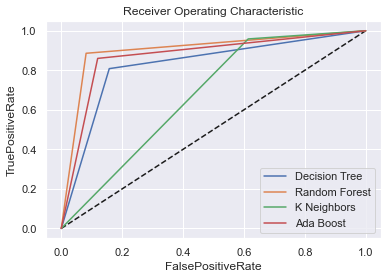

In [71]:
y_pred_prob1 = dt.predict(x_test)
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)

y_pred_prob2 = rfc.predict(x_test)
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)

y_pred_prob3 = knc.predict(x_test)
fpr3 , tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)

y_pred_prob4 = abc.predict(x_test)
fpr4 , tpr4, thresholds4 = roc_curve(y_test, y_pred_prob4)



plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Decision Tree")
plt.plot(fpr2, tpr2, label= "Random Forest")
plt.plot(fpr3, tpr3, label= "K Neighbors")
plt.plot(fpr4, tpr4, label= "Ada Boost")
plt.legend()
plt.xlabel("FalsePositiveRate")
plt.ylabel("TruePositiveRate")
plt.title('Receiver Operating Characteristic')
plt.show()

So as we have build 4 models and need to chose the best model among all models.

Let's check the feature importance to see which features are having high importance and less importance,

incident_severity              0.218703
insured_hobbies                0.047654
incident_state                 0.046662
vehicle_claim                  0.037972
property_claim                 0.036579
insured_zip                    0.030274
injury_claim                   0.029013
incident_location              0.028770
policy_number                  0.027769
policy_csl                     0.026935
policy_annual_premium          0.025719
auto_model                     0.023226
age                            0.021717
collision_type                 0.021656
incident_hour_of_the_day       0.021275
insured_occupation             0.021111
auto_make                      0.020802
policy_bind_year               0.020338
policy_bind_month              0.019847
authorities_contacted          0.019235
incident_day                   0.019091
capital-loss                   0.019024
auto_year                      0.017722
policy_bind_day                0.017568
policy_deductable              0.016141


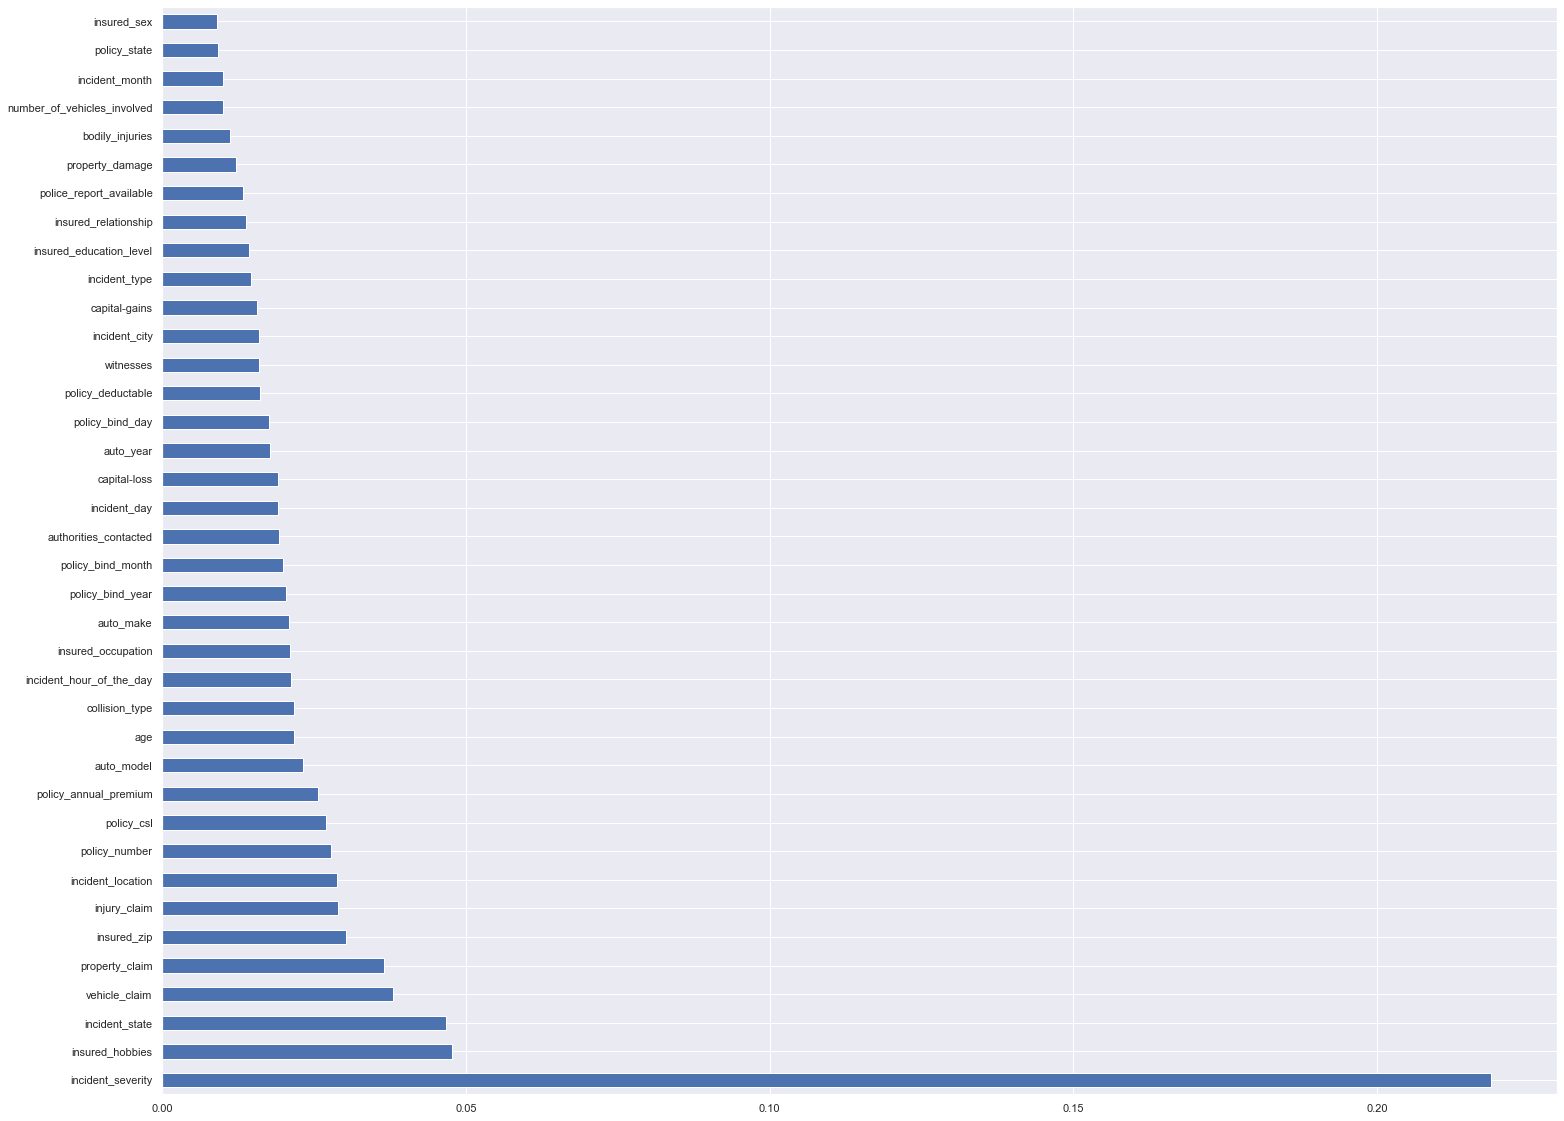

In [76]:
fea_imp = pd.Series(rfc.feature_importances_, index = X.columns)
fea_imp.nlargest(40).plot(kind= 'barh', figsize = (25,20))
print(fea_imp.nlargest(40))

So from the above graph, We can see that top features are  " incident_severity, insured_hobbies,incident_state,vehicle_claim,property_claim " and least important feature is "insured_sex"

Checking the f1 score accuracy and cross validation score of each model and the model which is having less difference is considered as best model.

Here the best model is DECISION TREE model.

Applying Hyper parameter tuning

In [81]:
param = {'criterion' : ['gini','entropy'] ,
         'splitter': ['best','random'], 
         'max_depth': range(20,80,5),
         'random_state' : [None],
         'max_leaf_nodes': range(15,50,5),
         'min_samples_leaf':[2,4,6,8,10,12],
                   }

In [82]:
gri_sea = GridSearchCV(dt, param_grid = param, cv = 5)
gri_sea.fit(x_train,y_train)
gri_sea.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_leaf_nodes': 15,
 'min_samples_leaf': 6,
 'random_state': None,
 'splitter': 'random'}

In [111]:
final  = DecisionTreeClassifier(criterion = 'entropy',max_depth = 80,max_leaf_nodes = 15,min_samples_leaf = 10,
                               random_state = None, splitter = 'best')
final.fit(x_train,y_train)
y_pred = final.predict(x_test)


print("F1 score \n", f1_score(y_test,y_pred))
print("-------------------------------------------------------\n")
print("Classification Report \n", classification_report(y_test,y_pred))
print("--------------------------------------------------------\n")
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))

F1 score 
 0.8486486486486486
-------------------------------------------------------

Classification Report 
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       184
           1       0.89      0.81      0.85       193

    accuracy                           0.85       377
   macro avg       0.85      0.85      0.85       377
weighted avg       0.85      0.85      0.85       377

--------------------------------------------------------

Confusion Matrix 
 [[164  20]
 [ 36 157]]
ROC AUC Score 
 0.8523879252083802


Model Accuracy Score has been increased from 80% to 85% and we can increase still depends on various parameters.

ROC curve for Final Model-

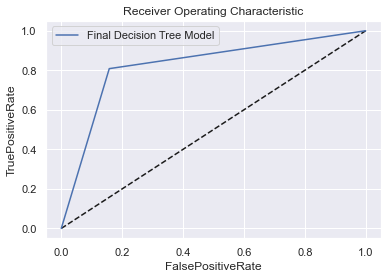

In [112]:
y_pred_fin = final.predict(x_test)
fpr , tpr, thresholds = roc_curve(y_test, y_pred_fin)


plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Final Decision Tree Model")
plt.legend()
plt.xlabel("FalsePositiveRate")
plt.ylabel("TruePositiveRate")
plt.title('Receiver Operating Characteristic')
plt.show()

In [113]:
ins = pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
ins.head(15)

,Actual,Predicted
993,0,0
635,1,1
1212,1,1
320,0,0
328,1,1
748,0,1
875,1,1
709,1,1
1419,1,0
12,0,0


Saving the Model,

In [114]:
import joblib
joblib.dump(final,'Insurance_Fraud_Detection.pkl')

['Insurance_Fraud_Detection.pkl']